# Task
from ctypes import Structure


We want to achieve the following workflow:

Step 1. 
- Use phonopy and phonolammps to calculate the DOS and band structure based on deepmd potentials
- Compare the results with DFT and experiments

Step 2.
- Calculate the mean root sqaured displacement for bulk and slab samples 
- Compare with experiments

  >>> Info of model(s):
  using   1 model(s): bulk_Al/MgAlCu_compress.pb 
  rcut in model:      9
  ntypes in model:    3
  >>> Info of model(s):
  using   1 model(s): bulk_Al/MgAlCu_compress.pb 
  rcut in model:      9
  ntypes in model:    3
  >>> Info of model(s):
  using   1 model(s): bulk_Al/MgAlCu_compress.pb 
  rcut in model:      9
  ntypes in model:    3


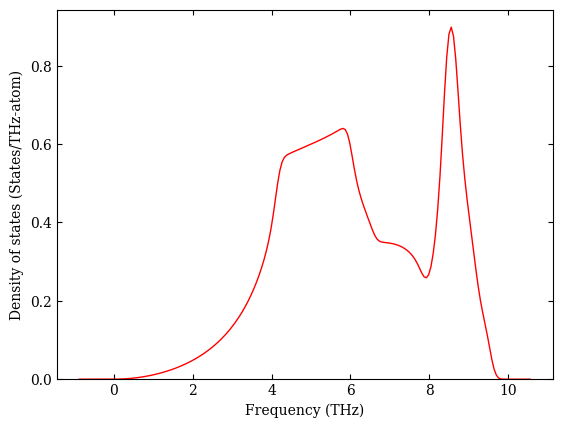

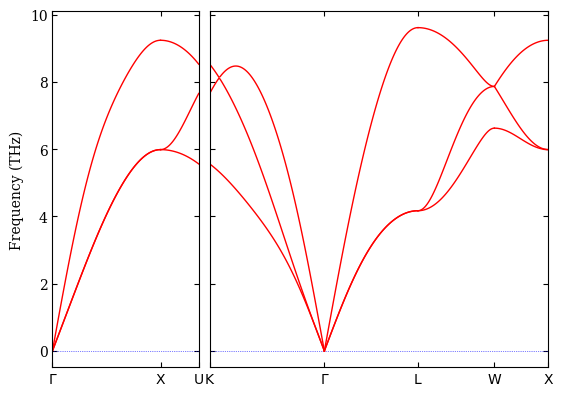

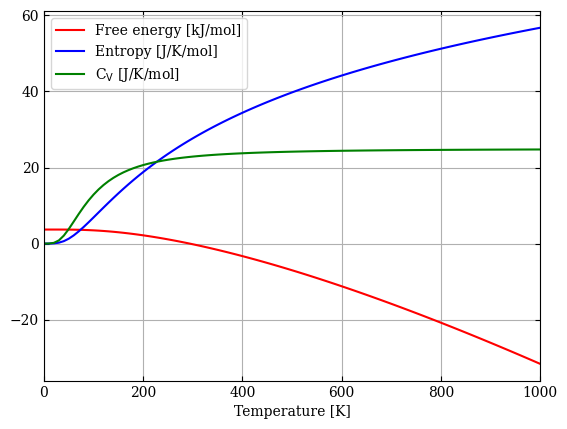

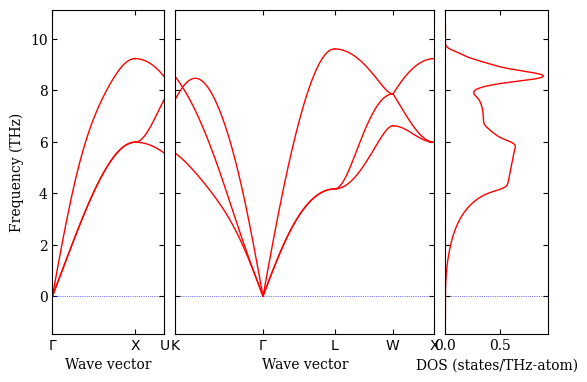

In [4]:
from phonolammps import Phonolammps
phlammps = Phonolammps('in.lammps',
                       supercell_matrix=[[5, 0, 0],
                                         [0, 5, 0],
                                         [0, 0, 5]],
                       primitive_matrix=[[1, 0, 0],[0, 1, 0],[0, 0, 1]])
unitcell = phlammps.get_unitcell()
force_constants = phlammps.get_force_constants()
supercell_matrix = phlammps.get_supercell_matrix()

from phonopy import Phonopy
phonon = Phonopy(unitcell,
                 supercell_matrix)

phonon.set_force_constants(force_constants)
phonon.set_mesh([100, 100, 100])
phonon.set_total_DOS()
phonon.set_thermal_properties()
phonon.auto_band_structure(write_yaml=True) 

dos_plot = phonon.plot_total_DOS()
dos_plot.savefig("total_dos.svg")
band_plot = phonon.plot_band_structure()
band_plot.savefig("band.svg")
thermal_plot = phonon.plot_thermal_properties()
thermal_plot.savefig("thermal.svg")
dos_band_plot = phonon.plot_band_structure_and_dos()
dos_band_plot.savefig("dos_band.svg")

- plot in reduced symmetry points for direct comparison with phonopy paper


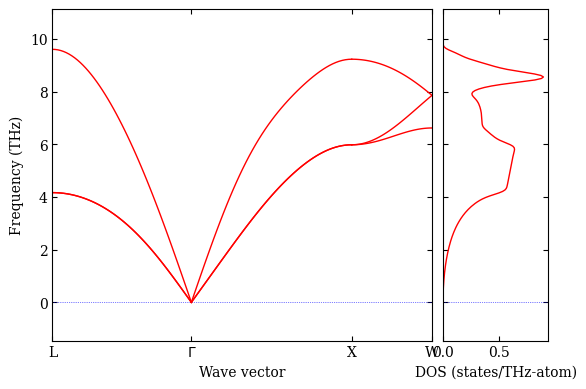

In [5]:
from phonopy.phonon.band_structure import get_band_qpoints_and_path_connections

path = [[0, 0, 0], [0.5, 0, 0.5], [0.625, 0.25, 0.625],
        [0.375, 0.375, 0.75], [0, 0, 0], [0.5, 0.5, 0.5], [0.5, 0.25, 0.75]]
labels = ["$\\Gamma$", "X", "U", "K", "$\\Gamma$", "L", "W"]
index = [5,4,1,-1]
labels = [labels[i] for i in index]
path = [[path[i] for i in index]]
qpoints, connections = get_band_qpoints_and_path_connections(path, npoints=51)

phonon.run_band_structure(qpoints, path_connections=connections, labels=labels)
dos_band_plot_r= phonon.plot_band_structure_and_dos()     
dos_band_plot_r.savefig("dos_band_reduced.svg")              

- Sanity check: intergration of density of states should be 3 for each atom

In [6]:
from quadpy.c1 import integrate_adaptive
from scipy.interpolate import interp1d
freq,dos=phonon.get_total_DOS()
func = interp1d(freq,dos)
states,err = integrate_adaptive(func,[0,max(freq)],eps_rel=1e-10)
states

2.999997325353436